#### Алгоритм для генерації граф-дороги

Для реалізації графу і роботи з ним мною був розроблений клас Graph.<br>
Екземпляри цього класу при створенні приймають 2 аргументи: кількість вершин (25 за замовчуванням) і кількість ребер для видалення (10 за замовчуванням).<br>
При ініціалізації екземпляру формується список зв’язків графу на основі даних про кількість вершин.<br>
Після цього викликається метод \_remove_edges() для видалення необхідної кількості ребер графа. Цей метод обирає дві випадкові сусідні вершини, видаляє ребро яке їх з'єднує і після цього проводить перевірку графа на зв'язність. У випадку якщо граф залишається зв'язним, ми продовжуємо повторювати ці дії для необхідної кількості ребер. У випадку якщо граф перестає бути зв'язним, ми повертаємо видалене ребро і протовжуємо повторювати вищеописані дії допоки не буде видалена необхідна кількість ребер.

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

In [2]:
class Graph:
    def __init__(self, vertices=25, edges_to_remove=10):
        self.vertices = vertices
        self.width = int(vertices ** 0.5)
        self.structure = {i: [] for i in range(vertices)}
        self._form_structure()
        self._remove_edges(edges_to_remove)
        self._coords = {}
        self._calc_coords()

    def _form_structure(self):
        for i in range(self.vertices-1):
            if (i+1) % self.width != 0:
                self.structure[i].append(i+1)
                self.structure[i+1].append(i)
            if i < (self.vertices - self.width):
                self.structure[i].append(i+self.width)
                self.structure[i+self.width].append(i)

    def _calc_coords(self):
        for i in range(self.width):
            for t in range(self.width):
                self._coords[t+(i*5)] = [i, t]

    def _add_edge(self, v1, v2):
        self.structure[v1].append(v2)
        self.structure[v2].append(v1)

    def _delete_edge(self, v1, v2):
        self.structure[v1].remove(v2)
        self.structure[v2].remove(v1)

    def _is_connected(self):
        not_visited = [i for i in range(self.vertices)]
        queue = [0]

        while queue:
            s = queue.pop(0)
            for neighbor in self.structure[s]:
                if neighbor in not_visited:
                    not_visited.remove(neighbor)
                    queue.append(neighbor)

        return not bool(not_visited)

    def _remove_edges(self, count):
        i = 0
        while i < count:
            vertex = random.randint(0, len(self.structure)-1)
            if len(self.structure[vertex])-1 == 0:
                continue
            neighbor = random.randint(0, len(self.structure[vertex])-1)
            neighbor = self.structure[vertex][neighbor]

            self._delete_edge(vertex, neighbor)
            if not self._is_connected():
                self._add_edge(vertex, neighbor)
            else:
                i += 1

In [3]:
def draw_graph(graph):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')

    coords = []
    for i in range(graph.width):
        for t in range(graph.width):
            coords.append([(i+1)*50,(t+1)*50])
            circle = Circle(((i+1)*50, (t+1)*50), 8, fill=True, color='black')
            ax.add_patch(circle)
            ax.text((i+1)*50, (t+1)*50, t+(i*5),
                    fontsize=10, color='white', ha='center', va='center')

    for i in graph.structure:
        for t in graph.structure[i]:
            line = Line2D([coords[i][0], coords[t][0]],
                          [coords[i][1], coords[t][1]],
                          color='black', linewidth=1)
            ax.add_line(line)

    ax.plot()
    ax.axis('off')
    plt.show()

    return coords

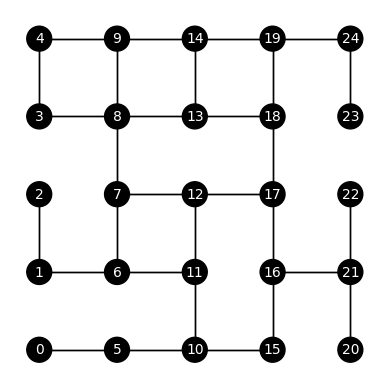

In [4]:
graph = Graph()
crds = draw_graph(graph)